<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, confusion_matrix
import statsmodels.api as sm
import io

# 1. Download data from https://science.sciencemag.org/content/359/6378/926 (supplementary materials).
- read the abstract of the article to get familiar with data origin
- open the data in excel and get familiar with its content
- load the protein level data (you need to figure out which one is that) as a pandas dataframe
- handle missing values and convert features to numeric values when it is needed
get rid of the unnecessary (which does not encode protein levels or the tumor type) columns and the CancerSEEK results

In [ ]:
# Upload the data
from google.colab import files

uploaded = files.upload()

In [ ]:
# Load the protein level data as pandas dataframe
cancer_df = pd.read_excel(io.BytesIO(uploaded['aar3247_cohen_sm_tables-s1-s11.xlsx']), sheet_name=5)
cancer_df

,Table S6. Concentrations of assayed protein biomarker in plasma samples from cancer patients and healthy controls.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
2,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,0.78,2882.65,92.02,2144.33,11.19,*131.46,0.53,*3857.712,377.26,*11.316,*8.238,5938.28,75826.6,14.29,315.23,14.22,12.04,0.47,56516.6,8852.96,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.8,0.938342,Positive
3,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,0.77,3921.77,164.06,1646.26,9.9,*131.46,2.39,5779.11,659.68,21.28,29.82,3409.18,211751,32.57,260.56,23.88,23.25,0.34,61001.4,20782.6,14375,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.1,0.925363,Positive
4,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,0.9,2410.16,154.77,2486.88,11.61,*131.46,0.5,*3857.712,329.07,*11.316,35.06,3338.6,2683.07,15.09,491.81,12.02,12.84,0.37,88896.2,7534.43,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.6,0.852367,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,PAPA 1357,PAPA 1357 PLS 1,Ovary,III,*879.498,3546.43,1493.32,1428.31,**836.85,37.9,13.78,*443.01,3060.11,1.01,1750.98,208.62,715.32,12.84,*32.802,0.75,17932.1,224.69,11,24.71,25193,93442.6,59.06,597.81,15.1,19.31,0.62,103657,9827.49,111737,1245.17,*207.24,72.22,3967.55,4045.18,*16.89,12877.1,88464,47219.2,1,Positive
1819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,*Protein concentration below the limit of dete...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,**Protein concentration above the limit of det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Set the correct column names

cancer_df.rename(columns=cancer_df.iloc[1, :], inplace=True)

# Remove the first row because it contains only NAs and the second row as well since it contains the column names
cancer_df.drop([0, 1], inplace=True)
cancer_df

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
2,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,0.78,2882.65,92.02,2144.33,11.19,*131.46,0.53,*3857.712,377.26,*11.316,*8.238,5938.28,75826.6,14.29,315.23,14.22,12.04,0.47,56516.6,8852.96,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.8,0.938342,Positive
3,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,0.77,3921.77,164.06,1646.26,9.9,*131.46,2.39,5779.11,659.68,21.28,29.82,3409.18,211751,32.57,260.56,23.88,23.25,0.34,61001.4,20782.6,14375,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.1,0.925363,Positive
4,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,0.9,2410.16,154.77,2486.88,11.61,*131.46,0.5,*3857.712,329.07,*11.316,35.06,3338.6,2683.07,15.09,491.81,12.02,12.84,0.37,88896.2,7534.43,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.6,0.852367,Negative
5,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,0.64,1284.96,227.57,829.43,4.8,152.24,0.19,7819.17,266.66,15.3,15.89,3162.89,41859.8,16.52,230.45,6.49,22.79,*0.29,42549.6,4722.42,12072.5,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.7,0.617639,Negative
6,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,0.78,2552.72,134.72,2168.23,8.92,*131.46,0.3,*3857.712,370.88,*11.316,*8.238,4442.46,100119,8.81,238.47,13.33,27.2,*0.29,24274.1,6945.9,23718.2,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.2,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,PAPA 1357,PAPA 1357 PLS 1,Ovary,III,*879.498,3546.43,1493.32,1428.31,**836.85,37.9,13.78,*443.01,3060.11,1.01,1750.98,208.62,715.32,12.84,*32.802,0.75,17932.1,224.69,11,24.71,25193,93442.6,59.06,597.81,15.1,19.31,0.62,103657,9827.49,111737,1245.17,*207.24,72.22,3967.55,4045.18,*16.89,12877.1,88464,47219.2,1,Positive
1819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,*Protein concentration below the limit of dete...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,**Protein concentration above the limit of det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cancer_df.columns

Index(['Patient ID #', 'Sample ID #', 'Tumor type', 'AJCC Stage',
       'AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)', 'CA-125 (U/ml)',
       'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)', 'CEA (pg/ml)',
       'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)', 'Endoglin (pg/ml)',
       'FGF2 (pg/ml)', 'Follistatin (pg/ml)', 'Galectin-3 (ng/ml)',
       'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)', 'HGF (pg/ml)',
       'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)',
       'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)',
       'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)',
       'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)',
       'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)',
       'TGFa (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)',
       'TIMP-2 (pg/ml)', 'CancerSEEK Logistic Regression Score',
       'CancerSEEK Test Result'],
      dtype='object')

In [ ]:
# remove the unnecessary (which does not encode protein levels or the tumor type) columns and the CancerSEEK results

cancer_usable_df = cancer_df.drop(columns=['Patient ID #', 'Sample ID #', 'AJCC Stage'])
cancer_usable_df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
2,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,0.78,2882.65,92.02,2144.33,11.19,*131.46,0.53,*3857.712,377.26,*11.316,*8.238,5938.28,75826.6,14.29,315.23,14.22,12.04,0.47,56516.6,8852.96,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.8,0.938342,Positive
3,Colorectum,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,0.77,3921.77,164.06,1646.26,9.9,*131.46,2.39,5779.11,659.68,21.28,29.82,3409.18,211751,32.57,260.56,23.88,23.25,0.34,61001.4,20782.6,14375,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.1,0.925363,Positive
4,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,0.9,2410.16,154.77,2486.88,11.61,*131.46,0.5,*3857.712,329.07,*11.316,35.06,3338.6,2683.07,15.09,491.81,12.02,12.84,0.37,88896.2,7534.43,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.6,0.852367,Negative
5,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,0.64,1284.96,227.57,829.43,4.8,152.24,0.19,7819.17,266.66,15.3,15.89,3162.89,41859.8,16.52,230.45,6.49,22.79,*0.29,42549.6,4722.42,12072.5,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.7,0.617639,Negative
6,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,0.78,2552.72,134.72,2168.23,8.92,*131.46,0.3,*3857.712,370.88,*11.316,*8.238,4442.46,100119,8.81,238.47,13.33,27.2,*0.29,24274.1,6945.9,23718.2,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.2,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,Ovary,*879.498,3546.43,1493.32,1428.31,**836.85,37.9,13.78,*443.01,3060.11,1.01,1750.98,208.62,715.32,12.84,*32.802,0.75,17932.1,224.69,11,24.71,25193,93442.6,59.06,597.81,15.1,19.31,0.62,103657,9827.49,111737,1245.17,*207.24,72.22,3967.55,4045.18,*16.89,12877.1,88464,47219.2,1,Positive
1819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove rows that contain only NA
cancer_usable_df.dropna(how='all', inplace=True)

In [ ]:
# Check NA
cancer_usable_df.isna().sum()

Tumor type                              0
AFP (pg/ml)                             0
Angiopoietin-2 (pg/ml)                  0
AXL (pg/ml)                             6
CA-125 (U/ml)                           0
CA 15-3 (U/ml)                          0
CA19-9 (U/ml)                           0
CD44 (ng/ml)                            6
CEA (pg/ml)                             0
CYFRA 21-1 (pg/ml)                      0
DKK1 (ng/ml)                            0
Endoglin (pg/ml)                        0
FGF2 (pg/ml)                            0
Follistatin (pg/ml)                     0
Galectin-3 (ng/ml)                      0
G-CSF (pg/ml)                           7
GDF15 (ng/ml)                           0
HE4 (pg/ml)                             0
HGF (pg/ml)                             0
IL-6 (pg/ml)                            0
IL-8 (pg/ml)                            0
Kallikrein-6 (pg/ml)                    6
Leptin (pg/ml)                          0
Mesothelin (ng/ml)                

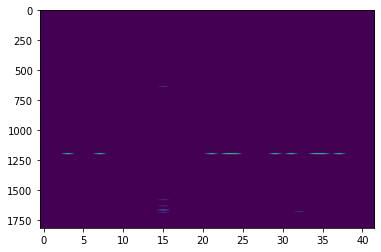

In [ ]:
plt.imshow(cancer_usable_df.isna(), aspect='auto')

In [ ]:
cancer_usable_df[cancer_usable_df['G-CSF (pg/ml)'].isna() == True]

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
638,Breast,*946.938,377.48,1340.5,8.01,21.66,22.75,9.46,4510.64,5055.63,0.73,659.63,238.53,200.08,5.01,NaN,0.19,*4044.792,203.59,8.22,10.25,5118.53,20208.4,8.8,132.63,12.22,5.16,0.12,17665.7,1222.48,221932,1776.54,1838.96,77.29,2187.49,3362.93,*16.542,*2123.195,31135.7,32801.3,0.999244,Positive
1583,Normal,*789.042,2087.33,2996.64,*4.998,14.8,*16.398,11.33,681.59,*1994.874,1.43,2205.04,102.9,546.78,2.38,NaN,0.15,*4045.05,*165.036,*3.618,*7.56,3613.24,17204.6,10.56,645.41,6.16,44.29,0.24,24236.4,8059.61,8162.48,2410.2,1290.2,20.06,6054.28,11007.1,*16.464,11823.4,73762.8,35875.2,0.190815,Negative
1634,Normal,*740.016,1683.29,2922.26,*4.608,12.71,22.62,22.3,833.44,*1816.458,1.05,1108.97,147.17,1222.83,22.91,NaN,0.32,*3775.74,166,5.31,*7.968,6491.71,143387,12.37,441.2,10,16.25,0.45,38470.2,9194.12,10143.8,2665.43,2442.53,52.12,6318.5,4077.37,*15.258,*835,60566.6,34229.3,0.19863,Negative
1665,Normal,5676.12,1502.17,1651.24,*4.608,4,*15.912,27.12,1353.23,6362.54,1.73,1146.48,*83.532,1413.6,7.42,NaN,1.06,*3775.74,*160.098,*3.096,*7.968,4529.66,9059.04,14.14,687.23,5.71,57.03,0.51,33357,15313.9,66013.7,1994.07,680.58,356.73,4098.85,6829.97,*15.258,14392.8,119560,45802.5,0.86605,Negative
1668,Normal,*740.016,764.56,2099.47,*4.608,21.56,*15.912,20.2,*441.264,*1816.458,1.11,273.08,*83.532,935.94,2.36,NaN,0.16,*3775.74,*160.098,*3.096,*7.968,2893.11,8778.57,17.08,438.47,4.94,42.51,0.22,42347.8,9870.91,18085.8,3039.03,696.03,45.71,7227.62,6310.26,*15.258,9344.8,51531.4,31820.4,0.130824,Negative
1673,Normal,*740.016,578.34,2627.21,*4.608,6.12,*15.912,26.41,*441.264,*1816.458,1.01,1880.66,*83.532,1229.16,5.73,NaN,0.2,*3775.74,*160.098,*3.096,*7.968,5520.56,129407,22.49,473.2,*1.3,30.86,0.29,17736.3,4206.58,4322.77,4804.17,*192.948,15.94,6385.17,4926.99,*15.258,1126.58,65394.3,36322.3,0.128712,Negative
1690,Normal,*740.016,775.3,1891.58,*4.608,9.18,*15.912,22.03,604.85,*1816.458,0.86,1430.89,122.78,555.97,3.74,NaN,0.25,*3775.74,*160.098,*3.096,*7.968,3407.95,46331.3,16.91,435.73,37.95,22.63,0.43,17179.2,6693.88,17622.5,2693.15,*192.948,24.93,3900.24,6242.88,*15.258,8094.23,63670.8,39661.3,0.358413,Negative


In [ ]:
cancer_usable_df[cancer_usable_df['AXL (pg/ml)'].isnull() == True]

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
1196,Normal,798.94,1131.04,NaN,20.25,5.11,18.6,NaN,*429.768,*1933.494,0.67,1024.11,83.39,534.89,3.89,83.8,0.08,*3970.08,*163.338,*3.438,*8.07,NaN,39954.9,NaN,NaN,5.11,10,0.41,14834.1,NaN,19336.8,NaN,*198.834,58.99,NaN,NaN,*16.164,NaN,46420.3,40948.5,0.489418,Negative
1197,Normal,*798.942,320.93,NaN,*4.818,8.1,*16.278,NaN,442.27,*1933.494,0.62,1553.5,87.56,523.64,8.2,76,0.1,*3970.08,*163.338,*3.438,*8.07,NaN,40923,NaN,NaN,16.96,10.8,0.26,22247.4,NaN,21203.2,NaN,*198.834,31.61,NaN,NaN,*16.164,NaN,43203.8,53386.9,0.259737,Negative
1198,Normal,*798.942,2931.23,NaN,11.54,9.95,*16.278,NaN,521.24,*1933.494,0.62,1172.89,*83.394,267.83,1.94,70.09,0.07,*3970.08,*163.338,*3.438,*8.07,NaN,20916.2,NaN,NaN,58.77,9,0.29,13691.6,NaN,8333.72,NaN,*198.834,69.6,NaN,NaN,*16.164,NaN,37636.6,56809.7,0.313944,Negative
1199,Normal,*798.942,3199.54,NaN,*4.818,6.16,21.26,NaN,*429.768,*1933.494,0.52,1052.11,91.61,756.76,4.55,131.15,0.06,*3970.08,*163.338,*3.438,*8.07,NaN,43168.7,NaN,NaN,28.08,7.44,0.36,13847.3,NaN,14646.7,NaN,*198.834,34.2,NaN,NaN,*16.164,NaN,47517.4,50526.8,0.355252,Negative
1200,Normal,*798.942,1527.6,NaN,*4.818,8.54,*16.278,NaN,1276.52,*1933.494,0.58,1002.16,99.4,398.26,8.74,83.8,0.07,*3970.08,*163.338,*3.438,*8.07,NaN,171654,NaN,NaN,13.7,9.17,0.27,10900.3,NaN,67273.1,NaN,*198.834,132.45,NaN,NaN,*16.164,NaN,45599.2,50970.9,0.418975,Negative
1201,Normal,*798.942,1313.48,NaN,*4.818,4.51,*16.278,NaN,899.38,*1933.494,0.67,1445.25,*83.394,640.06,6.27,*33.258,0.16,*3970.08,*163.338,*3.438,*8.07,NaN,4176.13,NaN,NaN,7.83,7.97,0.2,27398.8,NaN,12344.1,NaN,*198.834,72.19,NaN,NaN,*16.164,NaN,56541.5,47854.6,0.0639938,Negative


In [ ]:
cancer_usable_df.shape

(1817, 42)

In [ ]:
cancer_usable_df.dropna(how='any', inplace=True)
cancer_usable_df.shape

(1803, 42)

In [ ]:
cancer_usable_df.isna().sum()

Tumor type                              0
AFP (pg/ml)                             0
Angiopoietin-2 (pg/ml)                  0
AXL (pg/ml)                             0
CA-125 (U/ml)                           0
CA 15-3 (U/ml)                          0
CA19-9 (U/ml)                           0
CD44 (ng/ml)                            0
CEA (pg/ml)                             0
CYFRA 21-1 (pg/ml)                      0
DKK1 (ng/ml)                            0
Endoglin (pg/ml)                        0
FGF2 (pg/ml)                            0
Follistatin (pg/ml)                     0
Galectin-3 (ng/ml)                      0
G-CSF (pg/ml)                           0
GDF15 (ng/ml)                           0
HE4 (pg/ml)                             0
HGF (pg/ml)                             0
IL-6 (pg/ml)                            0
IL-8 (pg/ml)                            0
Kallikrein-6 (pg/ml)                    0
Leptin (pg/ml)                          0
Mesothelin (ng/ml)                

In [ ]:
# check features are numeric
cancer_usable_df.dtypes

Tumor type                              object
AFP (pg/ml)                             object
Angiopoietin-2 (pg/ml)                  object
AXL (pg/ml)                             object
CA-125 (U/ml)                           object
CA 15-3 (U/ml)                          object
CA19-9 (U/ml)                           object
CD44 (ng/ml)                            object
CEA (pg/ml)                             object
CYFRA 21-1 (pg/ml)                      object
DKK1 (ng/ml)                            object
Endoglin (pg/ml)                        object
FGF2 (pg/ml)                            object
Follistatin (pg/ml)                     object
Galectin-3 (ng/ml)                      object
G-CSF (pg/ml)                           object
GDF15 (ng/ml)                           object
HE4 (pg/ml)                             object
HGF (pg/ml)                             object
IL-6 (pg/ml)                            object
IL-8 (pg/ml)                            object
Kallikrein-6 

There are only object (string) data types in the dataframe. I must convert almost all columns' data into float data type. 

In [ ]:
# Replace * before the numbers because that prevent the convertation of objects into numeric data type 

cancer_usable_df.replace('\*', '', regex=True, inplace=True)

# Convert those object data types into numeric which are convertable in this way
cancer_usable_num_df = cancer_usable_df.apply(pd.to_numeric, errors='ignore')

# Encode 'Positive' as 1 and 'Negative' as 0
cancer_usable_num_df['CancerSEEK Test Result'].replace('Positive', 1, inplace = True)
cancer_usable_num_df['CancerSEEK Test Result'].replace('Negative', 0, inplace = True)

# Check the convertation
cancer_usable_num_df.dtypes

Tumor type                               object
AFP (pg/ml)                             float64
Angiopoietin-2 (pg/ml)                  float64
AXL (pg/ml)                             float64
CA-125 (U/ml)                           float64
CA 15-3 (U/ml)                          float64
CA19-9 (U/ml)                           float64
CD44 (ng/ml)                            float64
CEA (pg/ml)                             float64
CYFRA 21-1 (pg/ml)                      float64
DKK1 (ng/ml)                            float64
Endoglin (pg/ml)                        float64
FGF2 (pg/ml)                            float64
Follistatin (pg/ml)                     float64
Galectin-3 (ng/ml)                      float64
G-CSF (pg/ml)                           float64
GDF15 (ng/ml)                           float64
HE4 (pg/ml)                             float64
HGF (pg/ml)                             float64
IL-6 (pg/ml)                            float64
IL-8 (pg/ml)                            

# 2. Predict if a sample is cancerous or not
- your need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
- train a logistic regression (sklearn API) on every second sample (not first 50% of the data (!), use every second line)
- generate prediction for the samples that were not used during the training

In [ ]:
logreg_model = LogisticRegression(random_state=0)

In [ ]:
# reindex the dataframe to be usable in special train-test split
cancer_usable_num_df.reset_index(drop=True, inplace=True)

# Select each second row as train data
x_train = cancer_usable_num_df.iloc[::2, :]

# Select the remaining rows as test data
x_test = cancer_usable_num_df[cancer_usable_num_df.index % 2 != 0]

In [ ]:
x_train

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.810,540.07,1938.654,0.78,2882.650,92.02,2144.33,11.19,131.460,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342,1
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.590,973.75,1976.940,0.90,2410.160,154.77,2486.88,11.61,131.460,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367,0
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.210,614.49,1938.654,0.78,2552.720,134.72,2168.23,8.92,131.460,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434,0
6,Colorectum,1975.130,1900.89,3499.99,6.330,16.65,16.452,12.210,755.77,3329.430,0.86,1566.220,172.95,1765.41,7.67,422.750,0.28,9276.090,246.56,11.316,250.720,5123.27,25346.38,12.82,331.33,12.08,21.66,0.29,53572.27,12378.98,22077.74,2704.94,5389.050,61.54,9336.65,7965.05,26.020,12153.76,18718.19,24998.06,0.312262,0
8,Colorectum,1039.850,1103.02,954.25,5.700,6.23,36.310,6.835,895.66,1976.940,0.59,1513.170,205.52,790.19,5.63,131.460,0.14,6559.670,226.23,13.610,10.530,3060.70,28575.13,7.42,172.98,16.65,11.10,0.29,41313.18,3057.66,34149.07,1683.93,204.792,144.11,4232.62,4609.75,16.086,2033.03,18330.00,29151.57,0.625926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Ovary,879.498,1193.13,1459.03,535.160,14.97,1275.520,11.210,3180.53,2791.980,0.81,87.237,179.17,1302.17,4.97,32.802,3.20,90918.890,456.35,47.260,24.270,3082.77,2688.78,7.38,219.89,11.72,7.78,0.76,61053.08,5359.19,92871.04,1093.27,207.240,160.15,1384.40,2610.25,16.890,599.40,114792.87,46552.99,1.000000,1
1796,Ovary,879.498,2586.04,1297.25,2235.260,836.85,87.170,9.540,646.26,15756.220,1.74,1567.200,143.09,1073.84,6.07,150.370,0.54,16014.510,610.58,16.720,37.070,12452.76,14173.75,35.91,5270.96,18.46,27.14,0.46,100767.56,16530.77,74834.98,2173.05,207.240,77.33,4360.89,7425.41,16.890,5596.62,183636.90,50918.26,1.000000,1
1798,Ovary,879.498,1484.70,2096.76,24.820,10.30,42.390,14.920,914.00,1970.916,3.05,1113.680,221.80,875.57,8.51,133.080,0.41,4113.462,284.34,10.500,12.830,5376.57,66095.36,17.71,679.06,30.18,9.72,0.46,38603.84,16717.38,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.980312,1
1800,Ovary,879.498,1592.84,1044.45,30.480,8.48,16.440,8.260,443.01,3589.730,0.73,499.810,91.06,650.95,8.67,32.802,0.86,48893.330,309.22,10.500,11.160,7294.52,10713.71,37.91,467.40,11.93,4.30,0.29,93601.15,7127.74,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,1.000000,1


In [ ]:
x_test

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,0.77,3921.77,164.060,1646.26,9.90,131.460,2.39,5779.110,659.680,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363,1
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,0.64,1284.96,227.570,829.43,4.80,152.240,0.19,7819.170,266.660,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639,0
5,Colorectum,715.308,1147.55,2054.90,4.854,5.49,39.510,6.97,1242.25,1938.654,0.75,2459.50,123.750,1341.11,6.25,131.460,1.09,3857.712,269.990,11.316,9.470,4845.57,6804.38,16.88,276.87,10.60,22.32,0.57,66920.22,9321.12,16602.78,1871.12,204.792,251.78,6259.35,7935.75,16.086,9564.37,45870.23,48382.43,0.976304,1
7,Colorectum,992.170,1783.54,2478.39,4.854,11.44,16.452,11.23,478.98,1938.654,0.71,1574.60,145.020,1484.83,8.25,131.460,0.42,4701.460,312.810,11.316,8.238,5369.64,127507.81,21.40,216.77,8.42,15.58,0.29,73727.23,4793.64,14294.39,1203.16,204.792,207.62,4845.24,4512.37,16.086,2033.03,19099.46,27730.80,0.467655,0
9,Colorectum,6002.130,1942.35,1692.65,4.854,7.29,16.452,10.87,818.81,1938.654,0.64,2392.78,177.270,1229.47,14.81,131.460,0.14,3857.712,205.650,11.316,9.470,5617.59,13222.45,15.21,191.06,9.54,11.81,0.29,55873.69,3804.41,32295.94,1949.59,204.792,236.94,4474.35,5445.12,16.086,2229.02,11941.18,23460.29,0.350615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,Ovary,879.498,3530.52,831.42,918.760,836.85,151.450,11.01,443.01,7051.530,0.81,186.75,91.060,632.72,2.83,32.802,0.87,4113.462,284.340,23.840,11.160,28496.64,6770.80,126.27,422.79,14.68,5.97,0.59,81642.23,4783.76,71610.67,575.13,207.240,116.78,3281.80,3392.26,16.890,599.40,173510.42,46183.65,1.000000,1
1795,Ovary,3350.800,1629.00,728.48,549.330,147.53,27.840,8.43,443.01,5474.820,0.62,1413.58,120.420,4212.49,6.16,37.020,1.81,4113.462,164.412,32.240,13.250,10587.07,3195.46,46.68,467.40,9.41,5.65,0.39,42192.70,5094.16,78862.03,1867.65,207.240,146.82,3197.07,2361.74,16.890,599.40,47419.27,35770.30,1.000000,1
1797,Ovary,2346.580,1904.94,1014.04,7.390,9.85,16.440,12.56,1558.46,1970.916,1.16,1214.00,91.062,1540.65,5.47,452.540,0.57,4113.462,164.412,10.500,8.274,6137.30,33310.78,14.95,223.78,2.30,4.47,0.39,81270.70,6061.81,303759.07,2571.52,207.240,235.56,4272.28,5756.86,16.890,599.40,116448.80,70842.56,0.999963,1
1799,Ovary,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,1.74,1702.42,234.200,573.21,19.76,32.802,0.34,4113.462,374.030,10.500,8.274,6774.89,75175.83,21.95,524.17,39.62,79.03,0.44,29994.01,2656.02,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,0.999995,1


In [ ]:
# train a logistic regression (sklearn API) on every second sample 
logreg_model.fit(x_train.iloc[:, 1:-2], x_train.iloc[:, -1])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

y_test_pred = logreg_model.predict(x_test.iloc[:, 1:-2])
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
# Predict probabilities

y_test_pred_prob = logreg_model.predict_proba(x_test.iloc[:, 1:-2])[:, 1]
y_test_pred_prob

array([4.38682132e-02, 2.11197547e-01, 7.01193134e-02, 1.73430420e-01,
       2.32686812e-01, 7.57264706e-02, 9.94110231e-01, 2.80544418e-01,
       7.95831439e-01, 3.43565800e-01, 4.59449608e-01, 3.97447804e-01,
       3.76663096e-01, 2.35227481e-01, 5.05533117e-01, 1.81992934e-01,
       4.90237008e-01, 1.69946794e-01, 4.79524078e-01, 9.89426168e-02,
       9.35029591e-01, 1.78468546e-01, 1.30268081e-01, 6.16243548e-01,
       6.14313530e-01, 4.84212614e-01, 2.55749177e-01, 2.87045910e-01,
       9.79082513e-01, 2.25053353e-01, 7.24074421e-02, 3.11210662e-01,
       1.93841689e-01, 4.65087978e-02, 9.79571903e-01, 4.63695651e-01,
       9.78782179e-02, 5.09954066e-01, 7.78632071e-01, 4.03967287e-01,
       9.99999999e-01, 6.73714847e-01, 7.62772802e-01, 6.28849170e-01,
       9.99729401e-01, 9.99895355e-01, 8.76551281e-01, 9.71965057e-01,
       4.99298705e-01, 2.35361607e-01, 3.07296525e-01, 9.99652432e-01,
       3.61222993e-01, 1.96793964e-01, 6.87574896e-01, 8.43154091e-01,
      

# 3. Comparision to CancerSEEK

- plot the ROC curve and calculate the confusion matrix for the predictions
- do the same for the CancerSEEK predictions
- compare your model's performance to CancerSEEK performance


In [ ]:
x_test

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,0.77,3921.77,164.060,1646.26,9.90,131.460,2.39,5779.110,659.680,21.280,29.820,3409.18,211751.33,32.57,260.56,23.88,23.25,0.34,61001.39,20782.58,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363,1
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,0.64,1284.96,227.570,829.43,4.80,152.240,0.19,7819.170,266.660,15.300,15.890,3162.89,41859.78,16.52,230.45,6.49,22.79,0.29,42549.61,4722.42,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639,0
5,Colorectum,715.308,1147.55,2054.90,4.854,5.49,39.510,6.97,1242.25,1938.654,0.75,2459.50,123.750,1341.11,6.25,131.460,1.09,3857.712,269.990,11.316,9.470,4845.57,6804.38,16.88,276.87,10.60,22.32,0.57,66920.22,9321.12,16602.78,1871.12,204.792,251.78,6259.35,7935.75,16.086,9564.37,45870.23,48382.43,0.976304,1
7,Colorectum,992.170,1783.54,2478.39,4.854,11.44,16.452,11.23,478.98,1938.654,0.71,1574.60,145.020,1484.83,8.25,131.460,0.42,4701.460,312.810,11.316,8.238,5369.64,127507.81,21.40,216.77,8.42,15.58,0.29,73727.23,4793.64,14294.39,1203.16,204.792,207.62,4845.24,4512.37,16.086,2033.03,19099.46,27730.80,0.467655,0
9,Colorectum,6002.130,1942.35,1692.65,4.854,7.29,16.452,10.87,818.81,1938.654,0.64,2392.78,177.270,1229.47,14.81,131.460,0.14,3857.712,205.650,11.316,9.470,5617.59,13222.45,15.21,191.06,9.54,11.81,0.29,55873.69,3804.41,32295.94,1949.59,204.792,236.94,4474.35,5445.12,16.086,2229.02,11941.18,23460.29,0.350615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,Ovary,879.498,3530.52,831.42,918.760,836.85,151.450,11.01,443.01,7051.530,0.81,186.75,91.060,632.72,2.83,32.802,0.87,4113.462,284.340,23.840,11.160,28496.64,6770.80,126.27,422.79,14.68,5.97,0.59,81642.23,4783.76,71610.67,575.13,207.240,116.78,3281.80,3392.26,16.890,599.40,173510.42,46183.65,1.000000,1
1795,Ovary,3350.800,1629.00,728.48,549.330,147.53,27.840,8.43,443.01,5474.820,0.62,1413.58,120.420,4212.49,6.16,37.020,1.81,4113.462,164.412,32.240,13.250,10587.07,3195.46,46.68,467.40,9.41,5.65,0.39,42192.70,5094.16,78862.03,1867.65,207.240,146.82,3197.07,2361.74,16.890,599.40,47419.27,35770.30,1.000000,1
1797,Ovary,2346.580,1904.94,1014.04,7.390,9.85,16.440,12.56,1558.46,1970.916,1.16,1214.00,91.062,1540.65,5.47,452.540,0.57,4113.462,164.412,10.500,8.274,6137.30,33310.78,14.95,223.78,2.30,4.47,0.39,81270.70,6061.81,303759.07,2571.52,207.240,235.56,4272.28,5756.86,16.890,599.40,116448.80,70842.56,0.999963,1
1799,Ovary,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,1.74,1702.42,234.200,573.21,19.76,32.802,0.34,4113.462,374.030,10.500,8.274,6774.89,75175.83,21.95,524.17,39.62,79.03,0.44,29994.01,2656.02,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,0.999995,1


In [ ]:
y_test = x_test.iloc[:, -1]

y_test_pred_cancerseek = x_test.iloc[:, -2]

1       1
3       0
5       1
7       0
9       0
       ..
1793    1
1795    1
1797    1
1799    1
1801    1
Name: CancerSEEK Test Result, Length: 901, dtype: int64

In [ ]:
# Confusion matrix of own model

cnf_mtx = confusion_matrix(y_test, y_test_pred)
cnf_mtx

array([[535,  55],
       [ 55, 256]])

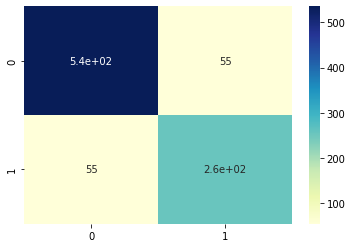

<Figure size 720x864 with 0 Axes>

In [ ]:
# Confusion matrix heatmap of own model

sns.heatmap(pd.DataFrame(cnf_mtx), annot=True, cmap="YlGnBu")
plt.figure(figsize=(10, 12))
plt.title = ('Confusion matrix')
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')



In [ ]:
# Confusion matrix of Cancerseek

cnf_mtx2 = confusion_matrix(y_test, x_test.iloc[:, -1])
cnf_mtx2

array([[590,   0],
       [  0, 311]])

In [ ]:
# Prepare for ROC curve plot

# ROC calculation for my own model
fpr, tpr, thresh = roc_curve(y_test, y_test_pred_prob)
# ROC calculation for Cancerseek 
fpr2, tpr2, thresh2 = roc_curve(y_test, y_test_pred_cancerseek)

# AUC calculation for my own model
auc = roc_auc_score(y_test, y_test_pred_prob)
# AUC calculation for Cancerseek
auc2 = roc_auc_score(y_test, y_test_pred_cancerseek)




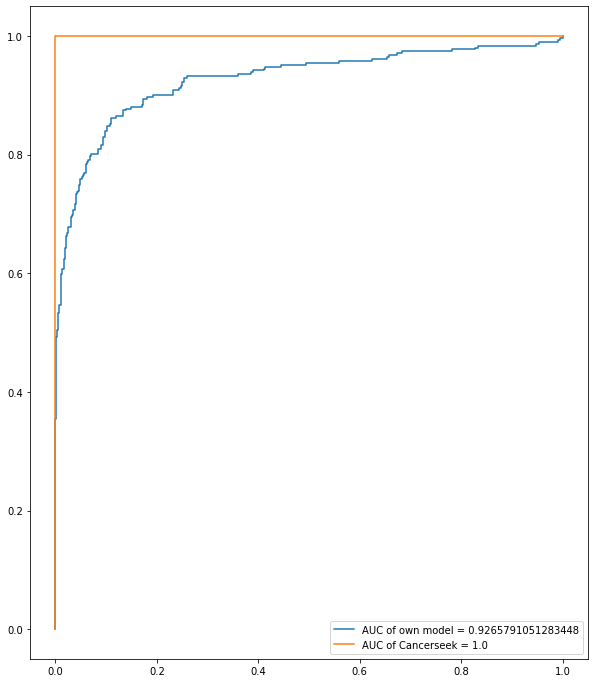

In [ ]:
# Plot ROC curve of my own model and Cancerseek as well

plt.figure(figsize=(10, 12))
plt.xlabel = ('False positive rate')
plt.ylabel = ('True positive rate')

plt.plot(fpr, tpr, label='AUC of own model = {}'.format(auc))
plt.plot(fpr2, tpr2, label='AUC of Cancerseek = {}'.format(auc2))
plt.legend()

My model can classify the sample for cancerous and not cancerous types (see the curve and AUC score), but Cancerseek is better.

4. Hepatocellular carcinoma

- fit a logistic regression (using statsmodels API this time) to predict if a sample has Hepatocellular carcinoma (liver cancer) or not. You need to keep only the liver and the normal samples for this exercise! For fitting use only the first 25 features and all the rows (which are liver or normal)
- select the 5 best predictor based on P values.
-  Write down the most important features (based on P value) and compare them to the tumor markers that you find on wikipeida https://en.wikipedia.org/wiki/Hepatocellular_carcinoma or other sources!


In [ ]:
liver_c_df = cancer_usable_num_df[(cancer_usable_num_df['Tumor type'] == 'Liver') | (cancer_usable_num_df['Tumor type'] == 'Normal')]
liver_c_df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
145,Liver,7843.860,1644.30,2868.99,9.570,12.85,41.970,21.06,3104.410,4152.370,0.66,3313.49,171.730,326.66,4.71,363.340,1.17,22122.730,1360.070,164.220,15.060,4572.12,6737.34,11.33,236.49,41.91,7.51,0.86,255477.37,3998.12,27997.96,726.77,2401.380,39.32,6060.80,6372.83,16.152,7945.950,150551.59,38711.14,1.000000,1
146,Liver,2030.920,852.82,762.79,4.896,21.49,26.390,13.78,1783.260,5189.040,0.64,1882.22,171.730,561.09,7.67,394.490,0.54,3835.158,508.470,82.310,14.500,1879.15,7408.66,9.68,259.41,123.99,7.51,0.58,71351.98,4330.20,25363.17,743.16,1180.960,207.34,4975.76,4698.34,16.152,10282.100,48099.87,24840.11,0.972510,1
147,Liver,959.916,4155.29,1302.39,4.896,22.27,16.134,11.76,1552.650,1918.914,0.63,2174.35,81.102,511.34,9.70,890.300,1.39,3835.158,1156.250,225.560,35.040,3956.49,29138.73,16.68,205.04,140.63,7.51,0.81,163373.59,3439.47,28690.22,2410.89,421.210,10.83,5612.85,5825.51,16.152,25272.120,102897.67,26922.04,0.999710,1
148,Liver,7417.290,937.12,7194.25,4.770,5.79,15.798,17.12,978.050,6202.710,0.82,2431.37,83.838,1020.67,4.63,31.440,1.00,3743.160,392.890,3.036,27.762,5969.76,5231.40,28.10,2109.50,12.14,5.81,0.72,65104.56,2754.34,36139.02,668.66,202.158,107.28,6935.33,5218.19,16.104,2229.275,76849.55,67225.11,0.990633,1
188,Liver,600608.892,2242.08,1047.07,6.290,9.58,50.350,8.98,1530.860,6047.910,1.54,2512.50,290.330,910.59,12.48,1231.600,1.15,4209.156,856.850,193.800,60.820,1901.10,14621.68,12.86,557.13,496.86,74.36,0.29,85706.64,13082.18,66871.31,293.12,2054.750,42.17,4546.75,6383.08,16.770,2173.560,63685.39,24648.53,0.999595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Normal,740.016,1683.29,2151.58,4.608,4.93,15.912,25.39,768.680,1816.458,1.09,852.66,83.532,525.16,4.32,42.414,0.26,3775.740,160.098,6.370,7.968,4075.05,44842.98,25.01,309.50,2.24,12.00,0.38,11165.42,4304.18,8378.74,2989.40,1237.140,60.85,5139.90,5071.28,15.258,835.000,59951.49,44169.16,0.169246,0
1685,Normal,740.016,802.16,1069.51,4.608,31.17,15.912,13.73,441.264,2320.110,1.45,1086.53,173.040,1690.26,4.34,214.920,0.41,3775.740,160.098,9.450,22.860,3592.74,20538.34,10.92,363.64,7.28,22.03,0.59,5619.16,1525.59,4574.35,1779.41,1237.140,24.30,4050.87,3317.55,15.258,1370.010,59816.96,40469.19,0.095699,0
1686,Normal,740.016,1112.37,1606.96,4.608,21.21,15.912,25.10,638.700,1816.458,1.27,1206.83,83.532,677.08,2.87,612.480,0.17,3775.740,160.098,3.096,7.968,4405.91,21128.44,23.67,329.19,5.83,23.04,0.26,30876.38,4401.66,20262.01,1823.73,623.750,14.60,3449.88,3141.06,15.258,835.000,59579.84,40979.86,0.154097,0
1687,Normal,740.016,583.62,1708.47,4.608,15.13,15.912,17.65,1264.430,1816.458,1.04,1838.23,119.130,154.46,4.21,42.414,0.39,3775.740,160.098,3.100,7.968,6212.73,72027.35,14.37,341.95,2.18,21.41,0.31,17374.45,2242.10,14147.17,2334.46,1142.230,28.83,3948.14,4318.48,15.258,835.000,67033.91,40559.19,0.118664,0


In [ ]:
# Add intercept
x_train_liver = sm.add_constant(liver_c_df.iloc[:, 1:26])
x_train_liver

,const,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml)
145,1.0,7843.860,1644.30,2868.99,9.570,12.85,41.970,21.06,3104.410,4152.370,0.66,3313.49,171.730,326.66,4.71,363.340,1.17,22122.730,1360.070,164.220,15.060,4572.12,6737.34,11.33,236.49,41.91
146,1.0,2030.920,852.82,762.79,4.896,21.49,26.390,13.78,1783.260,5189.040,0.64,1882.22,171.730,561.09,7.67,394.490,0.54,3835.158,508.470,82.310,14.500,1879.15,7408.66,9.68,259.41,123.99
147,1.0,959.916,4155.29,1302.39,4.896,22.27,16.134,11.76,1552.650,1918.914,0.63,2174.35,81.102,511.34,9.70,890.300,1.39,3835.158,1156.250,225.560,35.040,3956.49,29138.73,16.68,205.04,140.63
148,1.0,7417.290,937.12,7194.25,4.770,5.79,15.798,17.12,978.050,6202.710,0.82,2431.37,83.838,1020.67,4.63,31.440,1.00,3743.160,392.890,3.036,27.762,5969.76,5231.40,28.10,2109.50,12.14
188,1.0,600608.892,2242.08,1047.07,6.290,9.58,50.350,8.98,1530.860,6047.910,1.54,2512.50,290.330,910.59,12.48,1231.600,1.15,4209.156,856.850,193.800,60.820,1901.10,14621.68,12.86,557.13,496.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,1.0,740.016,1683.29,2151.58,4.608,4.93,15.912,25.39,768.680,1816.458,1.09,852.66,83.532,525.16,4.32,42.414,0.26,3775.740,160.098,6.370,7.968,4075.05,44842.98,25.01,309.50,2.24
1685,1.0,740.016,802.16,1069.51,4.608,31.17,15.912,13.73,441.264,2320.110,1.45,1086.53,173.040,1690.26,4.34,214.920,0.41,3775.740,160.098,9.450,22.860,3592.74,20538.34,10.92,363.64,7.28
1686,1.0,740.016,1112.37,1606.96,4.608,21.21,15.912,25.10,638.700,1816.458,1.27,1206.83,83.532,677.08,2.87,612.480,0.17,3775.740,160.098,3.096,7.968,4405.91,21128.44,23.67,329.19,5.83
1687,1.0,740.016,583.62,1708.47,4.608,15.13,15.912,17.65,1264.430,1816.458,1.04,1838.23,119.130,154.46,4.21,42.414,0.39,3775.740,160.098,3.100,7.968,6212.73,72027.35,14.37,341.95,2.18


In [ ]:
y_train_liver = liver_c_df.iloc[:, -1]
y_train_liver

145     1
146     1
147     1
148     1
188     1
       ..
1684    0
1685    0
1686    0
1687    0
1688    0
Name: CancerSEEK Test Result, Length: 843, dtype: int64

In [ ]:
logit_model = sm.Logit(y_train_liver, x_train_liver)
fitted_logit_model = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.061752
         Iterations 11


In [ ]:
fitted_logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     CancerSEEK Test Result   No. Observations:                  843
Model:                              Logit   Df Residuals:                      817
Method:                               MLE   Df Model:                           25
Date:                    Thu, 14 Oct 2021   Pseudo R-squ.:                  0.7256
Time:                            19:13:41   Log-Likelihood:                -52.057
converged:                           True   LL-Null:                       -189.73
Covariance Type:                nonrobust   LLR p-value:                 5.080e-44
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -7.3046      1.469     -4.971      0.000     -10.185      -4.425
AFP (pg/ml)              3.851e-05   2.75e-05      1.398      0.162   -1.55e-05    9.25e-05
Angiopoietin-2 (pg/ml)     -0.0003      0.000     -1.313      0.189      -0.001       0.000
AXL (pg/ml)                 0.0002      0.000      0.816      0.414      -0.000       0.001
CA-125 (U/ml)               0.1579      0.065      2.423      0.015       0.030       0.286
CA 15-3 (U/ml)              0.0281      0.022      1.257      0.209      -0.016       0.072
CA19-9 (U/ml)               0.0005      0.004      0.124      0.901      -0.008       0.009
CD44 (ng/ml)               -0.0890      0.046     -1.944      0.052      -0.179       0.001
CEA (pg/ml)             -2.535e-05      0.000     -0.062      0.950      -0.001       0.001
CYFRA 21-1 (pg/ml)      -4.883e-05      0.000     -0.155      0.877      -0.001       0.001
DKK1 (ng/ml)               -2.8436      1.033     -2.753      0.006      -4.868      -0.819
Endoglin (pg/ml)            0.0002      0.000      0.626      0.531      -0.000       0.001
FGF2 (pg/ml)                0.0056      0.006      0.917      0.359      -0.006       0.018
Follistatin (pg/ml)         0.0009      0.000      2.152      0.031    8.06e-05       0.002
Galectin-3 (ng/ml)          0.1011      0.062      1.623      0.105      -0.021       0.223
G-CSF (pg/ml)              -0.0014      0.002     -0.622      0.534      -0.006       0.003
GDF15 (ng/ml)               0.6236      0.405      1.539      0.124      -0.171       1.418
HE4 (pg/ml)             -1.796e-05      0.000     -0.085      0.933      -0.000       0.000
HGF (pg/ml)                 0.0129      0.003      4.391      0.000       0.007       0.019
IL-6 (pg/ml)                0.0160      0.024      0.671      0.502      -0.031       0.063
IL-8 (pg/ml)                0.0038      0.010      0.367      0.714      -0.017       0.024
Kallikrein-6 (pg/ml)        0.0001      0.000      0.846      0.398      -0.000       0.000
Leptin (pg/ml)          -6.405e-06   9.15e-06     -0.700      0.484   -2.43e-05    1.15e-05
Mesothelin (ng/ml)         -0.0095      0.035     -0.270      0.787      -0.079       0.060
Midkine (pg/ml)          4.219e-05      0.000      0.087      0.931      -0.001       0.001
Myeloperoxidase (ng/ml)     0.0075      0.008      0.914      0.361      -0.009       0.024
===========================================================================================
"""

### First 5 best predictors
1. **HGF (1.12e-05)**
2. **DKK1 (0.006)**
3. **CA-125 (0.015)**
4. **Follistatin (0.031)**
5. **CD44 (0.052)** 

In [ ]:
fitted_logit_model.pvalues

const                      6.656118e-07
AFP (pg/ml)                1.621469e-01
Angiopoietin-2 (pg/ml)     1.891073e-01
AXL (pg/ml)                4.142933e-01
CA-125 (U/ml)              1.538835e-02
CA 15-3 (U/ml)             2.086226e-01
CA19-9 (U/ml)              9.012768e-01
CD44 (ng/ml)               5.195141e-02
CEA (pg/ml)                9.501717e-01
CYFRA 21-1 (pg/ml)         8.769395e-01
DKK1 (ng/ml)               5.912708e-03
Endoglin (pg/ml)           5.311191e-01
FGF2 (pg/ml)               3.589589e-01
Follistatin (pg/ml)        3.137889e-02
Galectin-3 (ng/ml)         1.045525e-01
G-CSF (pg/ml)              5.342615e-01
GDF15 (ng/ml)              1.239069e-01
HE4 (pg/ml)                9.325492e-01
HGF (pg/ml)                1.128709e-05
IL-6 (pg/ml)               5.021937e-01
IL-8 (pg/ml)               7.138282e-01
Kallikrein-6 (pg/ml)       3.976196e-01
Leptin (pg/ml)             4.841086e-01
Mesothelin (ng/ml)         7.867888e-01
Midkine (pg/ml)            9.306127e-01


In [ ]:
sorted(list(fitted_logit_model.pvalues))[1:6]

[1.1287094045242582e-05,
 0.005912707764160834,
 0.015388353656586988,
 0.031378888314113916,
 0.05195140895322359]

# 5. Multiclass classification

- Again, using every second datapoint train a logistic regression (sklearn API) to predict the tumor type. It is a multiclass classification problem.
- Generate prediction for the rest of the dataset and show the confution matrix for the predictions!
- Plot the ROC curves for the different cancer types on the same plot!
- Intepret your results. Which cancer type can be predicted the most reliably?


In [ ]:
x_train

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),Endoglin (pg/ml),FGF2 (pg/ml),Follistatin (pg/ml),Galectin-3 (ng/ml),G-CSF (pg/ml),GDF15 (ng/ml),HE4 (pg/ml),HGF (pg/ml),IL-6 (pg/ml),IL-8 (pg/ml),Kallikrein-6 (pg/ml),Leptin (pg/ml),Mesothelin (ng/ml),Midkine (pg/ml),Myeloperoxidase (ng/ml),NSE (ng/ml),OPG (ng/ml),OPN (pg/ml),PAR (pg/ml),Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.810,540.07,1938.654,0.78,2882.650,92.02,2144.33,11.19,131.460,0.53,3857.712,377.26,11.316,8.238,5938.28,75826.61,14.29,315.23,14.22,12.04,0.47,56516.58,8852.96,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342,1
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.590,973.75,1976.940,0.90,2410.160,154.77,2486.88,11.61,131.460,0.50,3857.712,329.07,11.316,35.060,3338.60,2683.07,15.09,491.81,12.02,12.84,0.37,88896.24,7534.43,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367,0
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.210,614.49,1938.654,0.78,2552.720,134.72,2168.23,8.92,131.460,0.30,3857.712,370.88,11.316,8.238,4442.46,100119.47,8.81,238.47,13.33,27.20,0.29,24274.11,6945.90,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434,0
6,Colorectum,1975.130,1900.89,3499.99,6.330,16.65,16.452,12.210,755.77,3329.430,0.86,1566.220,172.95,1765.41,7.67,422.750,0.28,9276.090,246.56,11.316,250.720,5123.27,25346.38,12.82,331.33,12.08,21.66,0.29,53572.27,12378.98,22077.74,2704.94,5389.050,61.54,9336.65,7965.05,26.020,12153.76,18718.19,24998.06,0.312262,0
8,Colorectum,1039.850,1103.02,954.25,5.700,6.23,36.310,6.835,895.66,1976.940,0.59,1513.170,205.52,790.19,5.63,131.460,0.14,6559.670,226.23,13.610,10.530,3060.70,28575.13,7.42,172.98,16.65,11.10,0.29,41313.18,3057.66,34149.07,1683.93,204.792,144.11,4232.62,4609.75,16.086,2033.03,18330.00,29151.57,0.625926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Ovary,879.498,1193.13,1459.03,535.160,14.97,1275.520,11.210,3180.53,2791.980,0.81,87.237,179.17,1302.17,4.97,32.802,3.20,90918.890,456.35,47.260,24.270,3082.77,2688.78,7.38,219.89,11.72,7.78,0.76,61053.08,5359.19,92871.04,1093.27,207.240,160.15,1384.40,2610.25,16.890,599.40,114792.87,46552.99,1.000000,1
1796,Ovary,879.498,2586.04,1297.25,2235.260,836.85,87.170,9.540,646.26,15756.220,1.74,1567.200,143.09,1073.84,6.07,150.370,0.54,16014.510,610.58,16.720,37.070,12452.76,14173.75,35.91,5270.96,18.46,27.14,0.46,100767.56,16530.77,74834.98,2173.05,207.240,77.33,4360.89,7425.41,16.890,5596.62,183636.90,50918.26,1.000000,1
1798,Ovary,879.498,1484.70,2096.76,24.820,10.30,42.390,14.920,914.00,1970.916,3.05,1113.680,221.80,875.57,8.51,133.080,0.41,4113.462,284.34,10.500,12.830,5376.57,66095.36,17.71,679.06,30.18,9.72,0.46,38603.84,16717.38,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.980312,1
1800,Ovary,879.498,1592.84,1044.45,30.480,8.48,16.440,8.260,443.01,3589.730,0.73,499.810,91.06,650.95,8.67,32.802,0.86,48893.330,309.22,10.500,11.160,7294.52,10713.71,37.91,467.40,11.93,4.30,0.29,93601.15,7127.74,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,1.000000,1


In [ ]:
# Train a logistic regression (sklearn API) to predict the tumor type

# Prepare the model
multi_log_reg_model = LogisticRegression(multi_class='multinomial')

# Fit the model
multi_log_reg_model.fit(x_train.iloc[:, 1:-2], x_train['Tumor type'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_train.iloc[:, 0]

0       Colorectum
2       Colorectum
4       Colorectum
6       Colorectum
8       Colorectum
           ...    
1794         Ovary
1796         Ovary
1798         Ovary
1800         Ovary
1802         Ovary
Name: Tumor type, Length: 902, dtype: object

In [ ]:
# Predict probabilities
multi_y_test_pred_prob = multi_log_reg_model.predict_proba(x_test.iloc[:, 1:-2])
# Predict classes
multi_y_test_pred = multi_log_reg_model.predict(x_test.iloc[:, 1:-2])


In [ ]:
len(set(x for x in x_train['Tumor type']))

9

In [ ]:
multi_y_test = x_test['Tumor type']

1       Colorectum
3       Colorectum
5       Colorectum
7       Colorectum
9       Colorectum
           ...    
1793         Ovary
1795         Ovary
1797         Ovary
1799         Ovary
1801         Ovary
Name: Tumor type, Length: 901, dtype: object

In [ ]:
# Create confusion matrix
multi_cnf_mtx = confusion_matrix(multi_y_test, multi_y_train_pred)
multi_cnf_mtx

array([[ 22,  32,   0,   0,   1,  40,   1,   6,   0],
       [  9, 120,   5,   3,   8,  38,   3,   1,  10],
       [  0,  13,   1,   0,   0,   5,   0,   0,   0],
       [  3,   8,   0,  12,   0,   1,   0,   0,   0],
       [  6,  23,   0,   0,   8,   8,   3,   1,   0],
       [  9,  19,   0,   0,   1, 365,   0,   5,   0],
       [  0,  13,   0,   0,   1,   3,   9,   1,   1],
       [  3,  11,   1,   0,   0,  23,   0,  10,   0],
       [  3,  17,   2,   0,   2,   8,   0,   0,   3]])

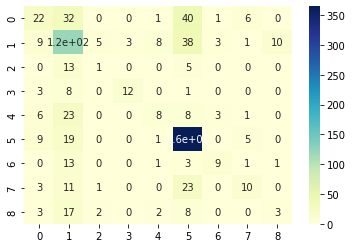

In [ ]:
# Heatmap of confusion matrix
sns.heatmap(pd.DataFrame(multi_cnf_mtx), annot=True, cmap="YlGnBu")

In [ ]:
types_classes = set(x for x in x_test['Tumor type'])
types_classes


{'Breast',
 'Colorectum',
 'Esophagus',
 'Liver',
 'Lung',
 'Normal',
 'Ovary',
 'Pancreas',
 'Stomach'}

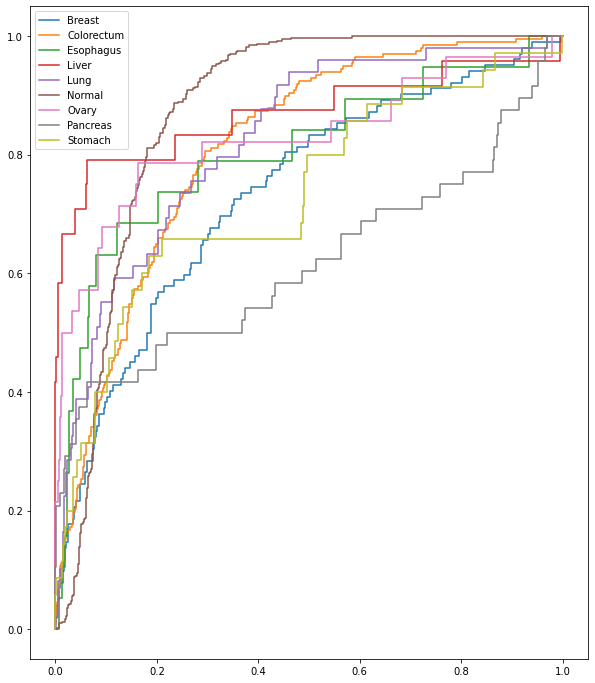

In [ ]:
tumor_type_dict = {}
classes = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Normal', 'Ovary', 'Pancreas', 'Stomach']

# Create proper y list for each classes (just contain 1 and 0)
for classe in classes:
  y_list = []
  for i in x_test['Tumor type']:
    if i == classe:
      y_list.append(1)
    else: y_list.append(0)
  tumor_type_dict.update({classe : y_list})


# Calculate ROC of actual class and plot it
plt.figure(figsize=(10, 12))
for id, classe in enumerate(classes):
  y_list = tumor_type_dict[classe]
  fpr, tpr, thresh = roc_curve(y_list, multi_y_test_pred_prob[:, id])
  plt.plot(fpr, tpr, label = classe)
plt.legend()

It's difficult to tell for which cancer type the prediction is the most reliable, but the model performs a little bit better for colorectum and lung tumors than the others.